In [126]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import scipy as sp
from IPython.display import Image

# Task easy

$ y'' + e (y^2 - 1) y' + y = 0 $

$ x' = z, z' = e (1 - x^2) z - x $ 

$ x(0) = 2, z(0) = 0, 0<t<100, 1/100 < e < 100 $

In [127]:
eps = 1

def f_calc(x, z):
    return np.array((z, eps*(1-x**2)*z-x))

def f_calc_v(y, t):
    x,z = y
    return np.array((z, eps*(1-x**2)*z-x))

In [128]:
def test_method(func, n, name=''):
    t,y = func(n)
    fig = px.line(x=t, y=y[:,0], title=f'{name}, n={n}').add_trace(go.Scatter(x=t, y=y[:,1]))
    display(Image(fig.to_image(format="png", width=1200, height=800, scale=1)))

In [129]:
def calc_scipy(n):
    return (
        np.linspace(0, 100, n+1, endpoint=True), 
        sp.integrate.odeint(f_calc_v, np.array((2,0)), np.linspace(0, 100, n+1, endpoint=True))
    )

### explicit Runge-Kutt - Модифицированный метод Эйлера с пересчетом

![Alt text](explic_rk1.png)

In [130]:
def calc_expl_rk(n):
    tmax = 100
    tmin = 0
    h = (tmax - tmin)/n
    t = np.linspace(tmin, tmax, n+1, endpoint=True)
    y = np.zeros((n+1, 2))
    # return t.shape, y[0].shape
    y[0] = (2, 0)
    for i in range(1, n+1):
        y1 = y[i-1] + h * f_calc(*y[i-1])
        y[i] = y[i-1] + (h/2 * (f_calc(*y[i-1])+f_calc(*y1)))
    return t, y 

## explicit Adams' method

$ % http://w.ict.nsc.ru/books/textbooks/akhmerov/nm-ode_unicode/1-6.html $ 

![Alt text](adams_2nd.png)

y' = f(y)
y1 = y0 + y'*h + y'' * h^2/2 + O(h^3)


In [131]:
def runge_kutt_iter(y0, h): 
    y1 = y0 + h * f_calc(*y0)
    y1 = y0 + (h/2 * (f_calc(*y0)+f_calc(*y1)))
    return y1

def calc_adams(n):
    tmax = 100
    tmin = 0
    h = (tmax - tmin)/n
    t = np.linspace(tmin, tmax, n+1, endpoint=True)
    y = np.zeros((n+1, 2))
    y[0] = (2, 0)
    y[1] = runge_kutt_iter(y[0], h)
    for i in range(2, n+1):
        y[i] = y[i-1] + h/2 * (3 * f_calc(*y[i-1]) - f_calc(*y[i-2]))
    return t, y

## Backwards differentiating formula

y[n+1] = (4/3) * y[n] - (1/3) * y[n-1] + (2/3) * h * f(t[n+1], y[n+1])

or

y[n] = (4/3) * y[n-1] - (1/3) * y[n-2] + (2/3) * h * f(t[n], y[n])

In [132]:
def calc_bdf(n):
    tmax = 100
    tmin = 0
    h = (tmax - tmin)/n
    t = np.linspace(tmin, tmax, n+1, endpoint=True)
    y = np.zeros((n+1, 2))
    y[0] = (2, 0)
    y[1] = runge_kutt_iter(y[0], h)
    for i in range(2, n+1):
        to_solve = lambda yi: -yi + (4/3) * y[i-1] - (1/3) * y[i-2] + (2/3) * h * f_calc(*yi)
        y[i] = sp.optimize.fsolve(to_solve, y[i-1])
    return t, y

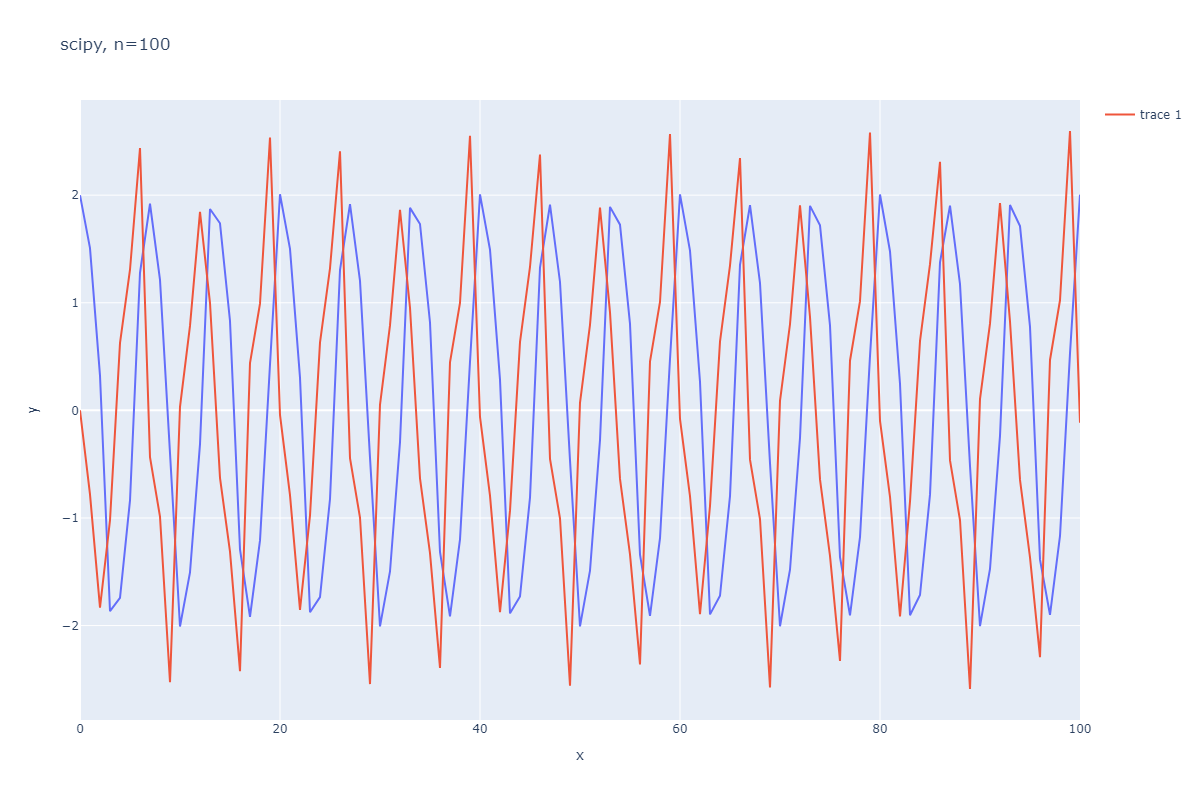

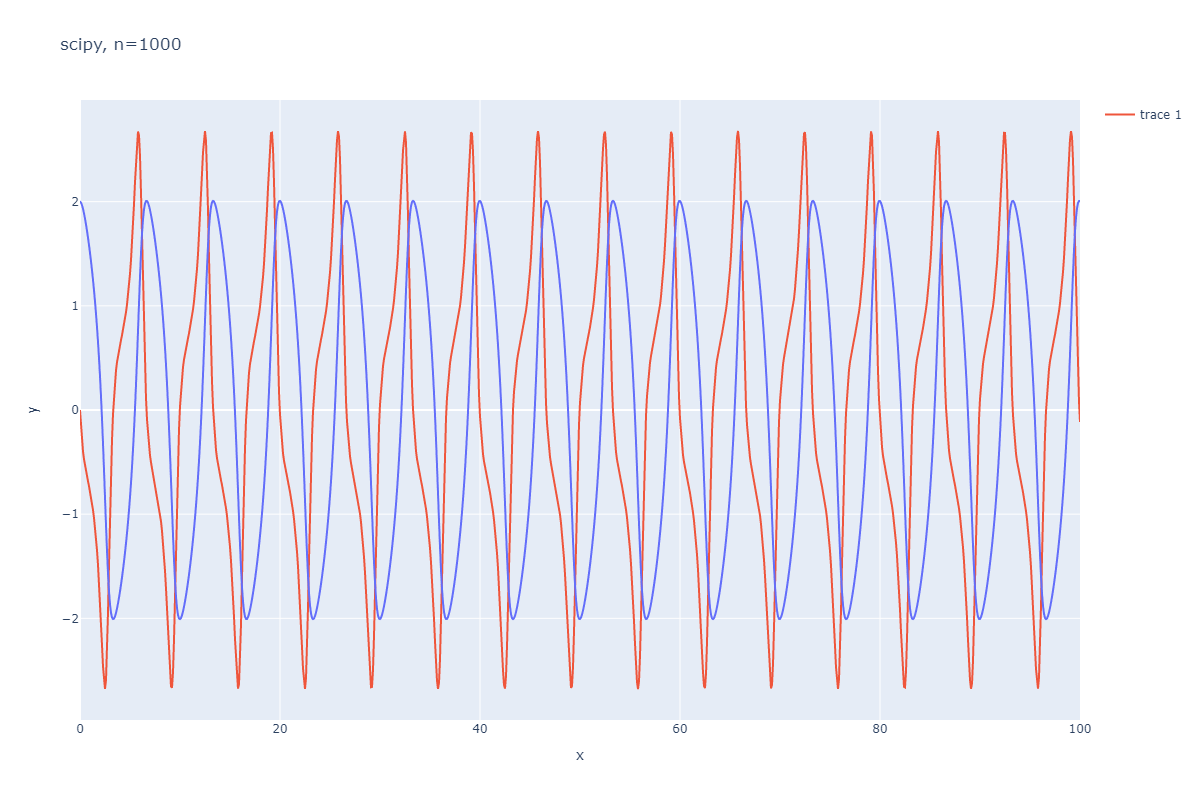

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2791817989.py:4: RuntimeWarning:

overflow encountered in scalar multiply

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2791817989.py:4: RuntimeWarning:

overflow encountered in scalar power

C:\Users\User\AppData\Local\Temp\ipykernel_3612\471669879.py:11: RuntimeWarning:

invalid value encountered in add



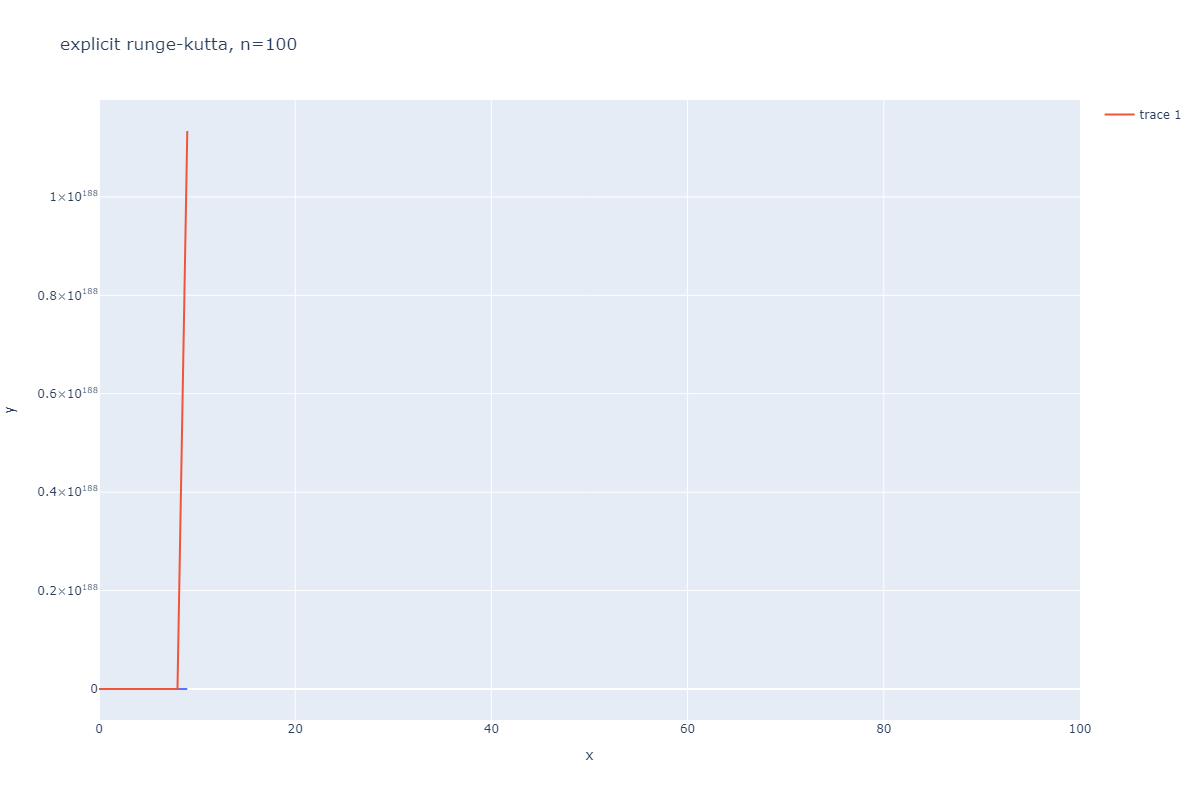

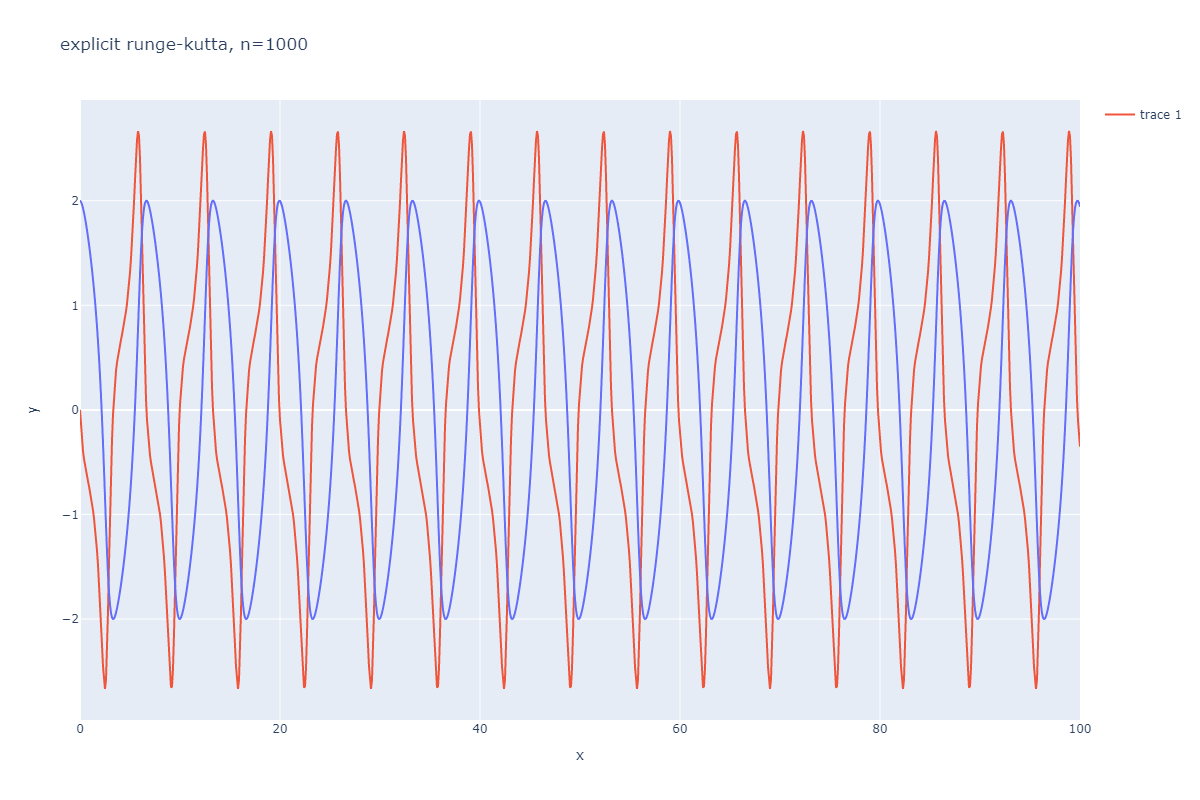

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2791817989.py:4: RuntimeWarning:

overflow encountered in scalar multiply

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2791817989.py:4: RuntimeWarning:

overflow encountered in scalar power

C:\Users\User\AppData\Local\Temp\ipykernel_3612\1401004139.py:15: RuntimeWarning:

invalid value encountered in add



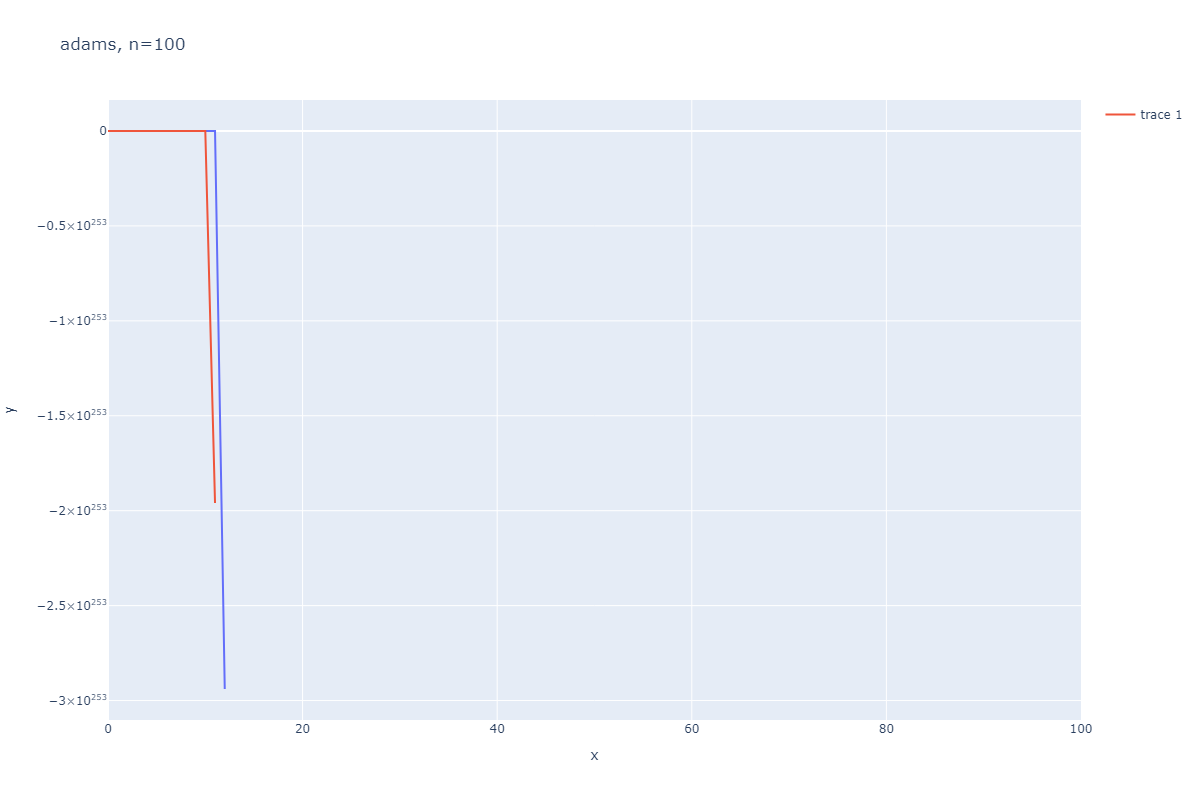

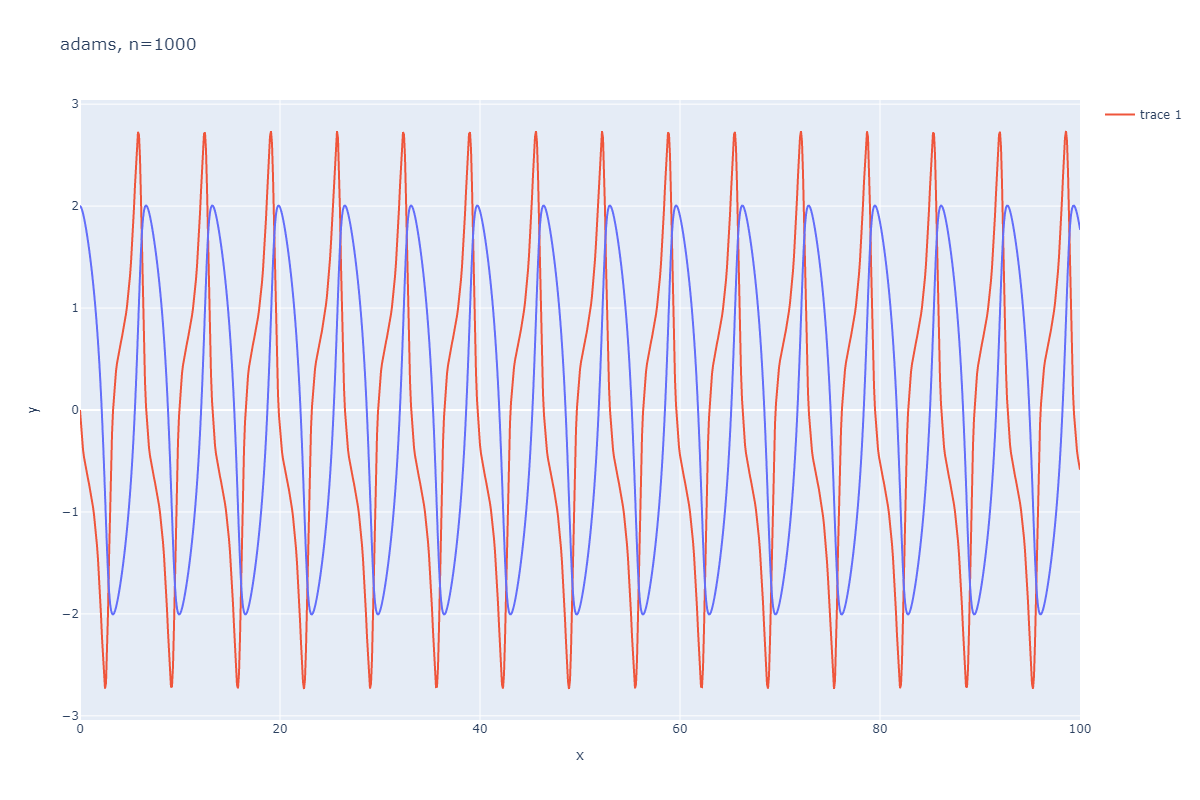

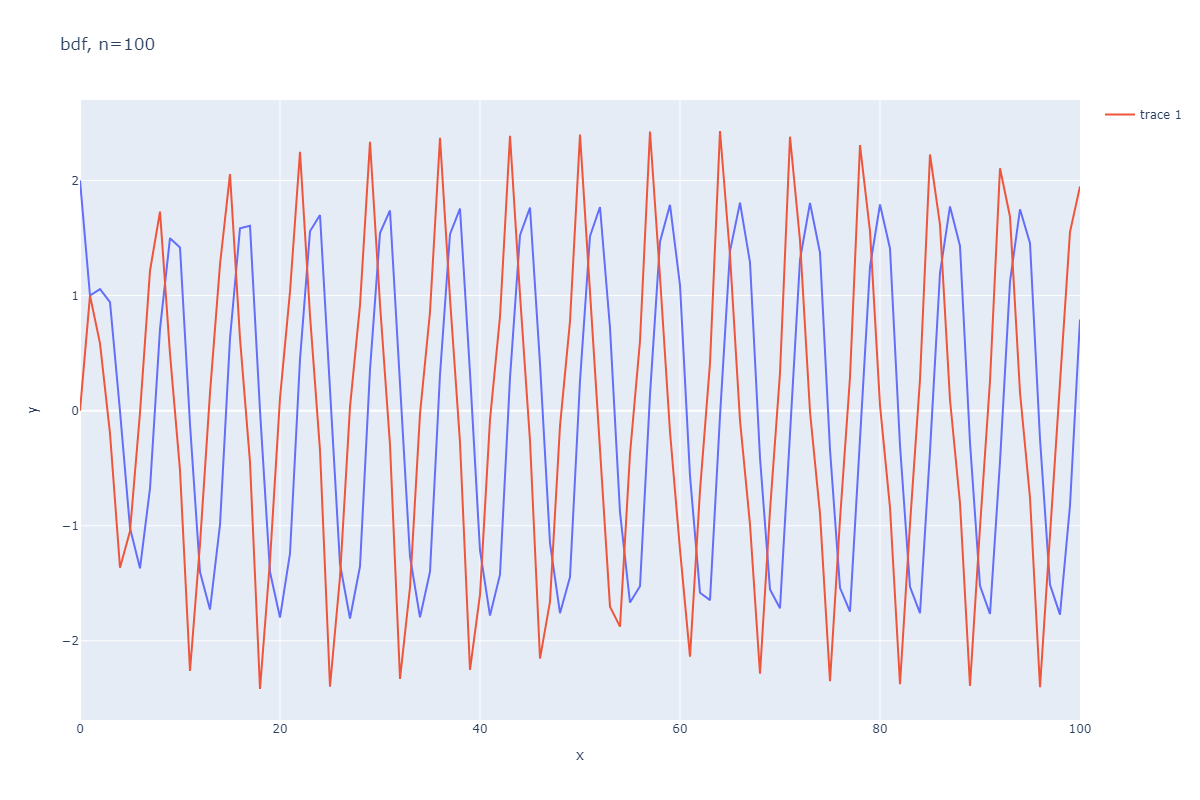

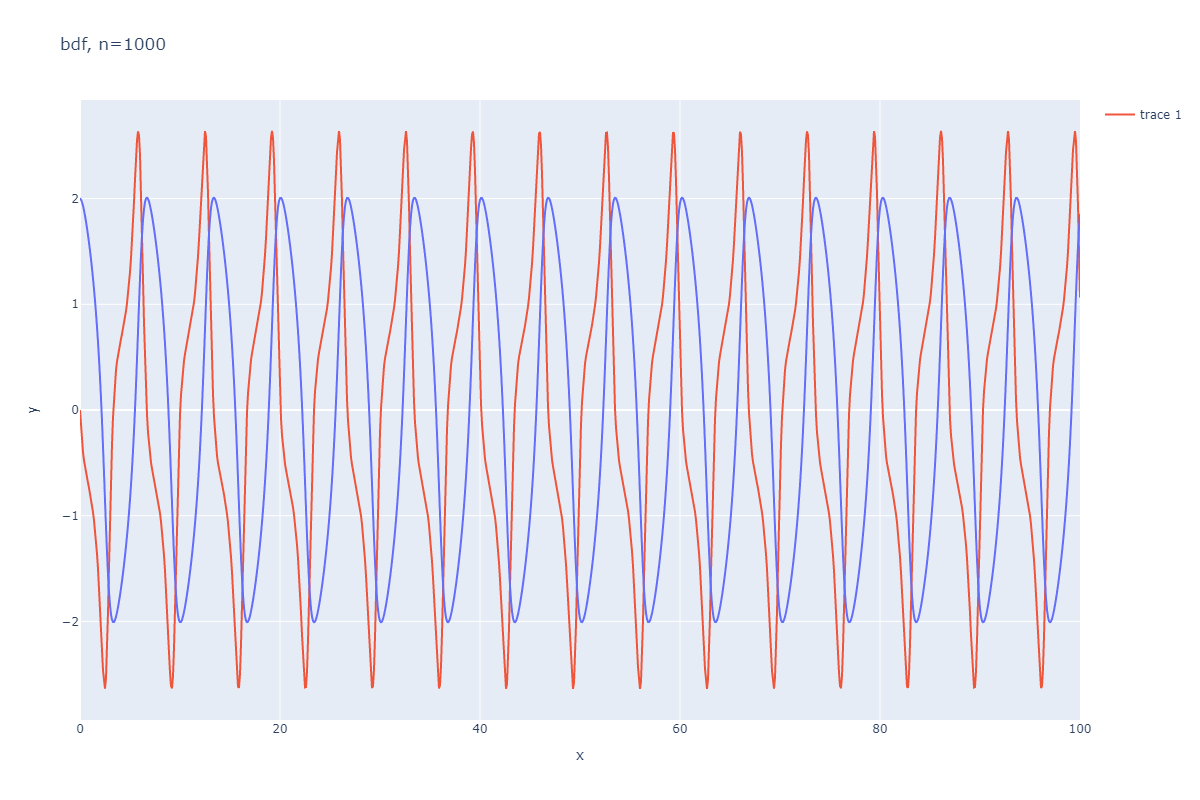

In [133]:
for func, name in zip(
        [calc_scipy, calc_expl_rk, calc_adams, calc_bdf], 
        ['scipy', 'explicit runge-kutta', 'adams', 'bdf']
    ):
    for n in [100, 1000]:
        test_method(func, n, name)

# Task hard

![Alt text](hardtask.png)

In [145]:
eps = 0.01
y0 = np.array((3, 15, 0.01))

def f_calc(x, y, a):
    return np.array(
        (x*(1 - 0.5*x - 2/7/a**2 * y),
         y*(2*a - 3.5*a**2*x - 0.5*y),
         eps*(2 - 7*a*x))
    )

def f_calc_v(y, t):
    return f_calc(*y)

In [146]:
def test_method(func, n, name=''):
    t,y = func(n)
    fig = px.line(x=t, y=y[:,0], title=f'{name}, n={n}').add_trace(go.Scatter(x=t, y=y[:,1])).add_trace(go.Scatter(x=t, y=y[:,2]))
    display(Image(fig.to_image(format="png", width=1200, height=800, scale=1)))

In [147]:
def calc_scipy(n):
    return (
        np.linspace(0, 100, n+1, endpoint=True), 
        sp.integrate.odeint(f_calc_v, y0, np.linspace(0, 1500, n+1, endpoint=True))
    )

## Implicit runge-kutt

### SDIRK method

![Alt text](sdirk.png)

Source: https://www.mathnet.ru/links/7408ea1523279fa5eef2e6e06d201072/mm653.pdf

y[n+1] = y[n] + h * sum(b[i] * k[i]), where:

$ k_i = f(t_n + c_i*h, y_n + h*\sum_{j=1}^2{a_{i,j}*k_j} ), i=1,2 $


In [148]:
def calc_implicit_rk(n):
    g = 1 - 2**0.5 / 2
    c = np.array((g, 1))
    a = np.array((
        (g, 0),
        (1-g, g)
    ))
    b = np.array((1-g, g))

    tmax = 1500
    tmin = 0
    h = (tmax - tmin)/n
    t = np.linspace(tmin, tmax, n+1, endpoint=True)
    y = np.zeros((n+1, 3))
    y[0] = y0
    k = np.zeros((2,3))

    def to_call(yn):
        def to_solve(flat_k):
            k = flat_k.reshape((2,3))
            ans =  np.array((
                k[0] - f_calc(yn[0] + h * sum(a[0]*k[:,0]), yn[1] + h * sum(a[0]*k[:,1]), yn[2] + h * sum(a[0]*k[:,2])),
                k[1] - f_calc(yn[0] + h * sum(a[1]*k[:,0]), yn[1] + h * sum(a[1]*k[:,1]), yn[2] + h * sum(a[0]*k[:,2]))
            ))
            return ans.flatten()
        return to_solve

    for i in range(1, n+1):
        to_solve = to_call(y[i-1])
        k = sp.optimize.fsolve(to_solve, [1]*6).reshape((2,3))
        y[i][0] = y[i-1][0] + h*sum(b*k[:,0])
        y[i][1] = y[i-1][1] + h*sum(b*k[:,1])
        y[i][2] = y[i-1][2] + h*sum(b*k[:,2])
    return t, y 

## Rosenbrock's method

![Alt text](Rosenbrock.png)

In [149]:
def f_calc(x, y, a):
    return np.array(
        (x*(1 - 0.5*x - 2/7/a**2 * y),
         y*(2*a - 3.5*a**2*x - 0.5*y),
         eps*(2 - 7*a*x))
    )

import sympy
def get_jacobian(eps):
    x,y,a = sympy.symbols('x y a')
    f_sym = sympy.Matrix([
            x*(1 - 0.5*x - 2/7/a**2 * y),
            y*(2*a - 3.5*a**2*x - 0.5*y),
            eps*(2 - 7*a*x)
    ])
    return sympy.lambdify((x,y,a), f_sym.jacobian([x,y,a]), 'numpy')

In [150]:
def calc_rosenbrock(n):
    J = get_jacobian(eps)

    tmax = 1500
    tmin = 0
    h = (tmax - tmin)/n
    t = np.linspace(tmin, tmax, n+1, endpoint=True)
    y = np.zeros((n+1, 3))
    y[0] = y0

    for i in range(1, n+1):
        left = np.eye(3) - h/2 * (1+1j) * J(*y[i-1])
        right = f_calc(*y[i-1])
        k = np.linalg.solve(left, right)
        y[i] = y[i-1] + h * k.real
    return t, y 

## Implicit Adams' methods/BDF - Nordsick

![Alt text](nordsick.png)

In [179]:
print("""For Nordsick, needed equation couldn't run properly :((((
but some other equation (see lower) runs perfectly so it is unclear why """)

def calc_nordsick_(n, l, y0, f_calc):
    tmax = 100
    tmin = 0
    h = (tmax - tmin)/n
    t = np.linspace(tmin, tmax, n+1, endpoint=True)
    y = np.zeros((n+1, 3))
    y[0] = y0

    k = len(l)
    z = np.zeros(shape=(k, 3))
    z[0] = y0
    e = np.zeros(k)
    e[1] = 1
    P = sp.linalg.pascal(k, kind='upper')
    for i in range(1,n+1):
        pz = np.matmul(P, z)
        z = pz + np.outer(l, (h * f_calc(*y[i-1]) - np.matmul(e, pz)))
        y[i] = z[0]

    return t, y

def calc_nordsick(n):
    return calc_nordsick_(n, np.array([6/11,1,6/11,1/11]), y0, f_calc)

For Nordsick, needed equation couldn't run properly :((((
but some other equation (see lower) runs perfectly so it is unclear why 


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



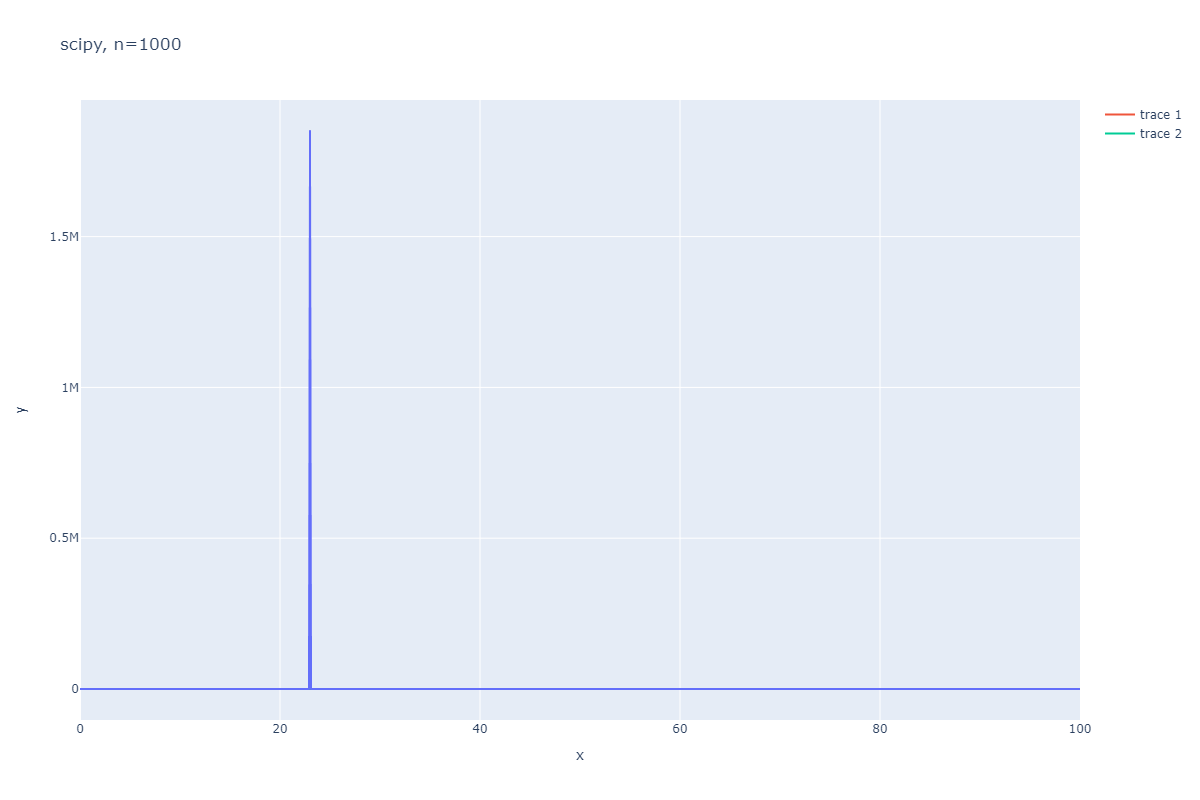

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



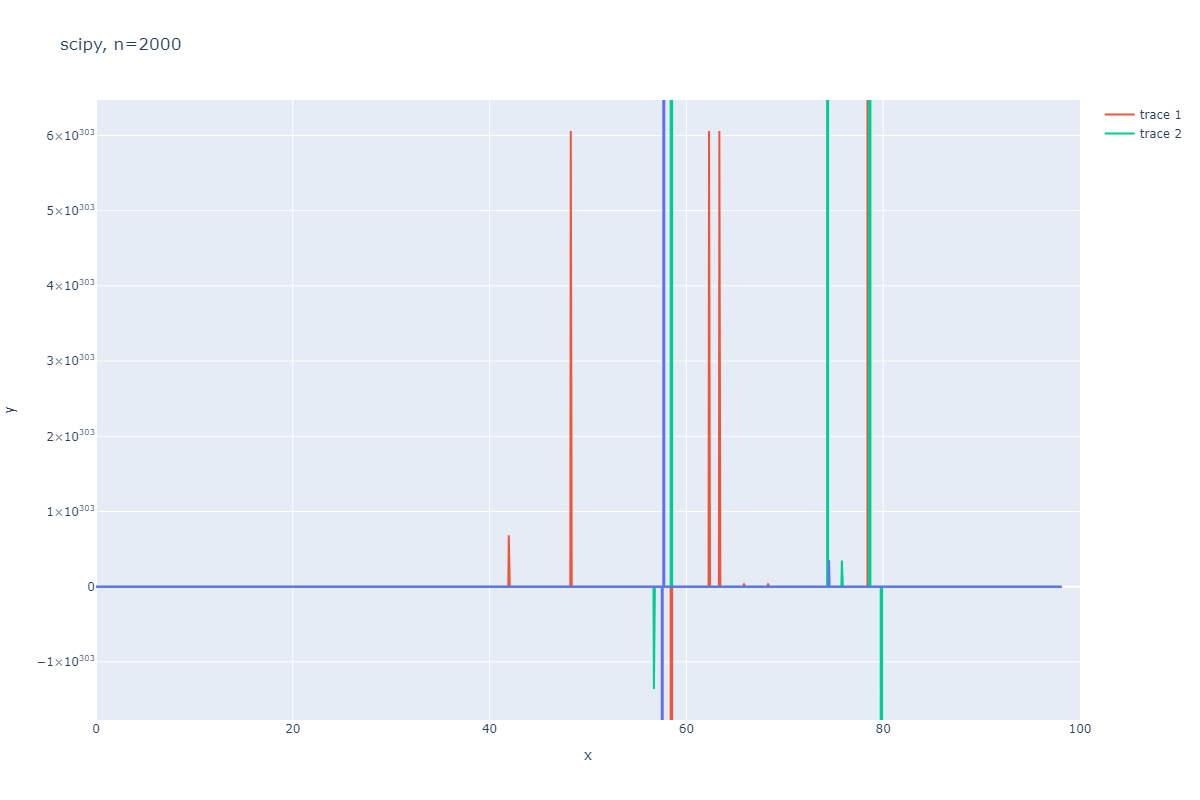

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



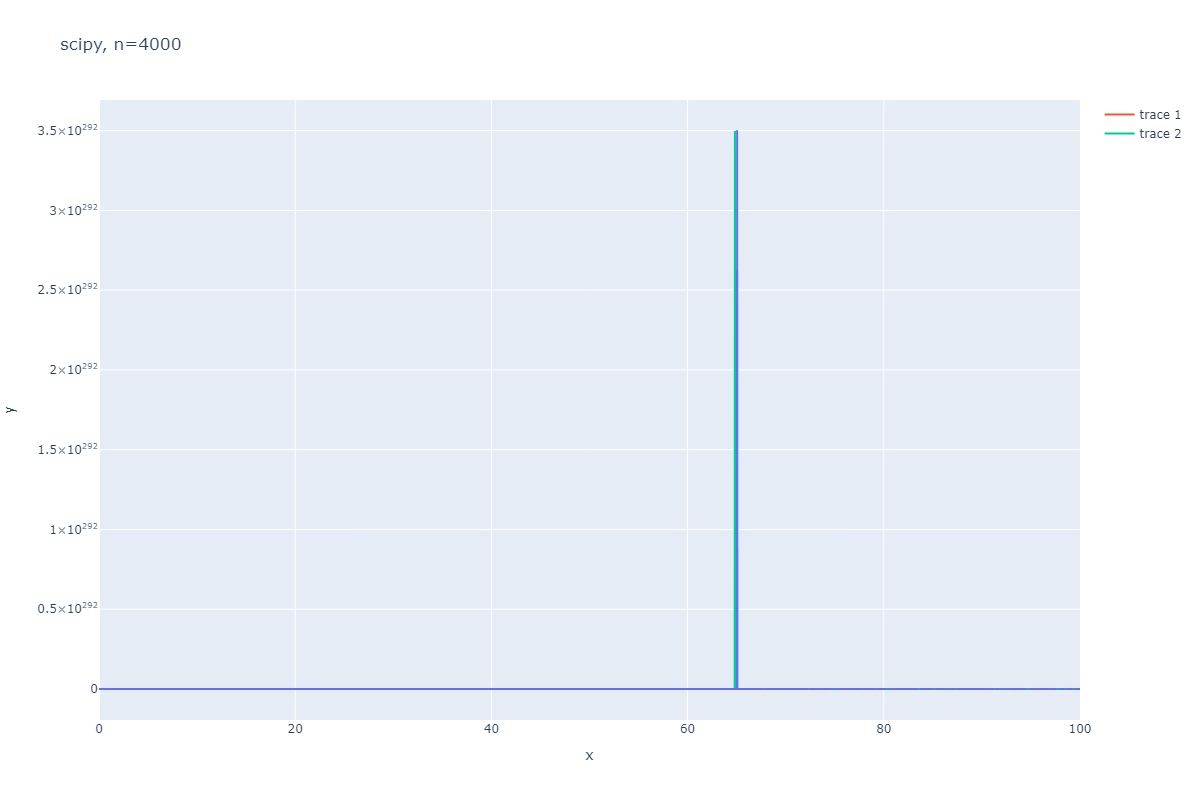

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



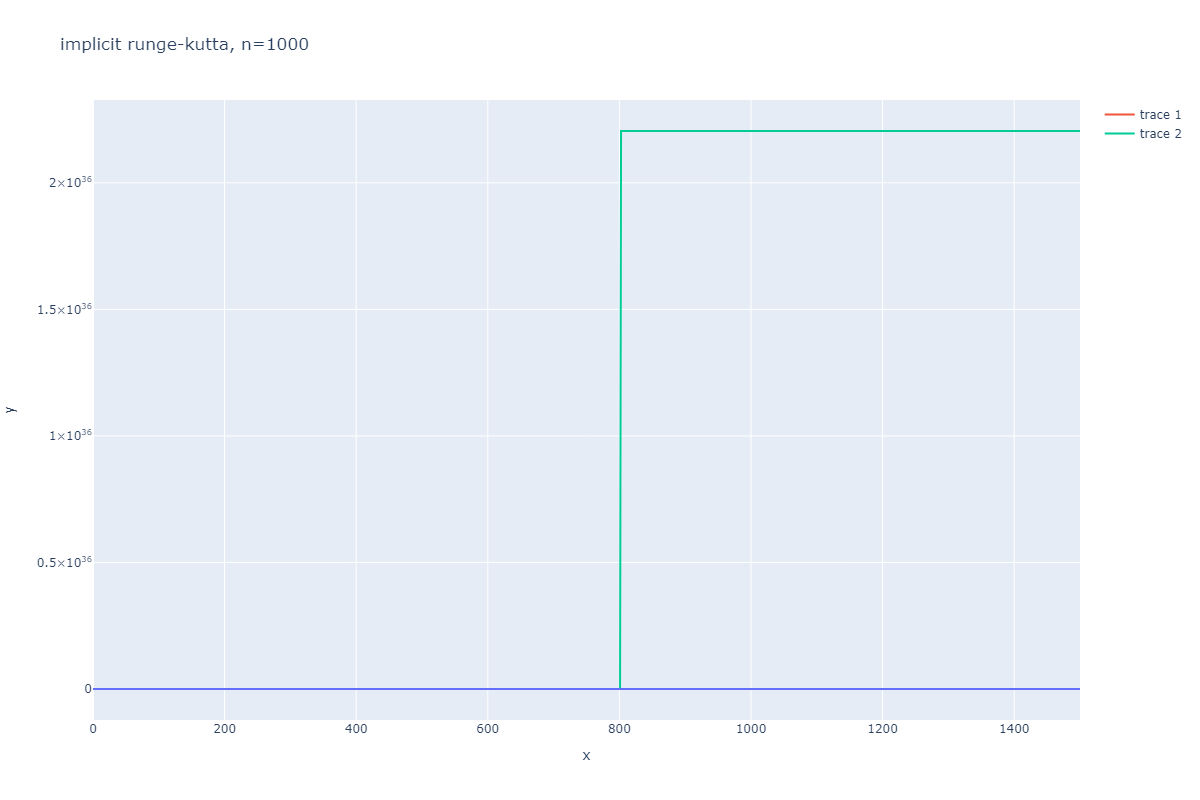

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



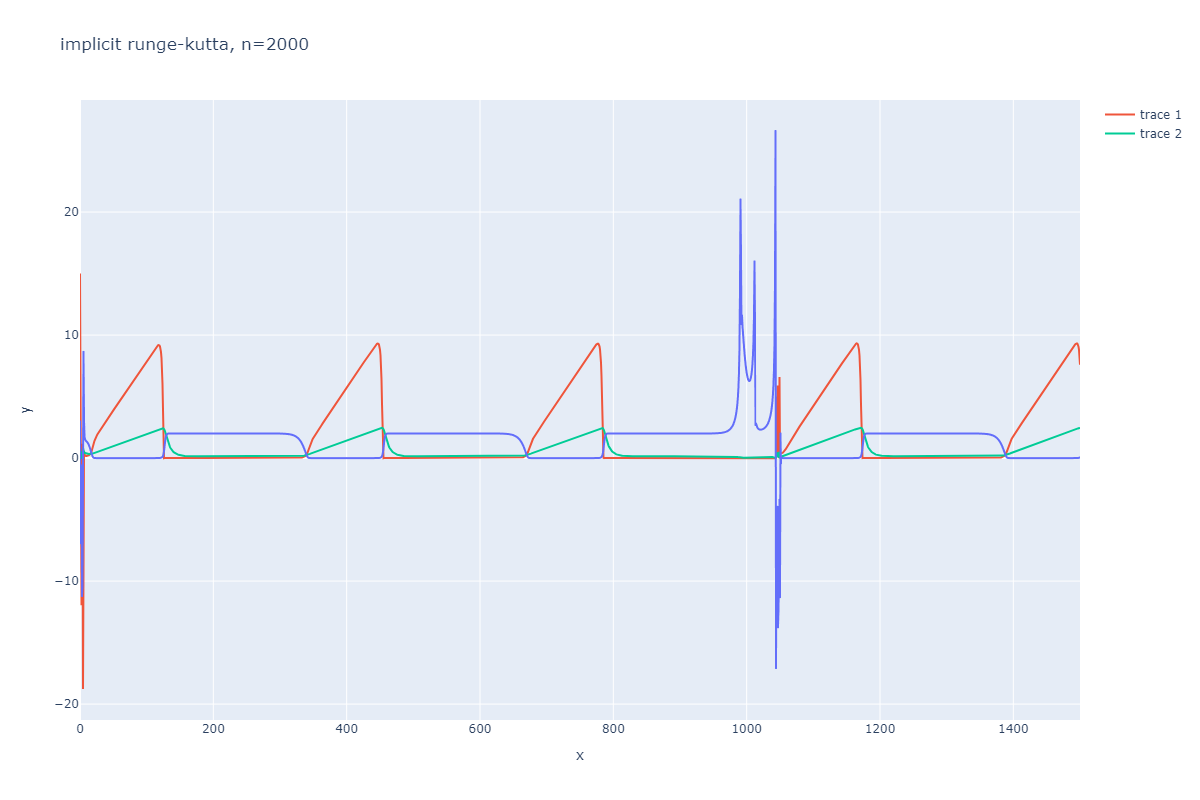

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.



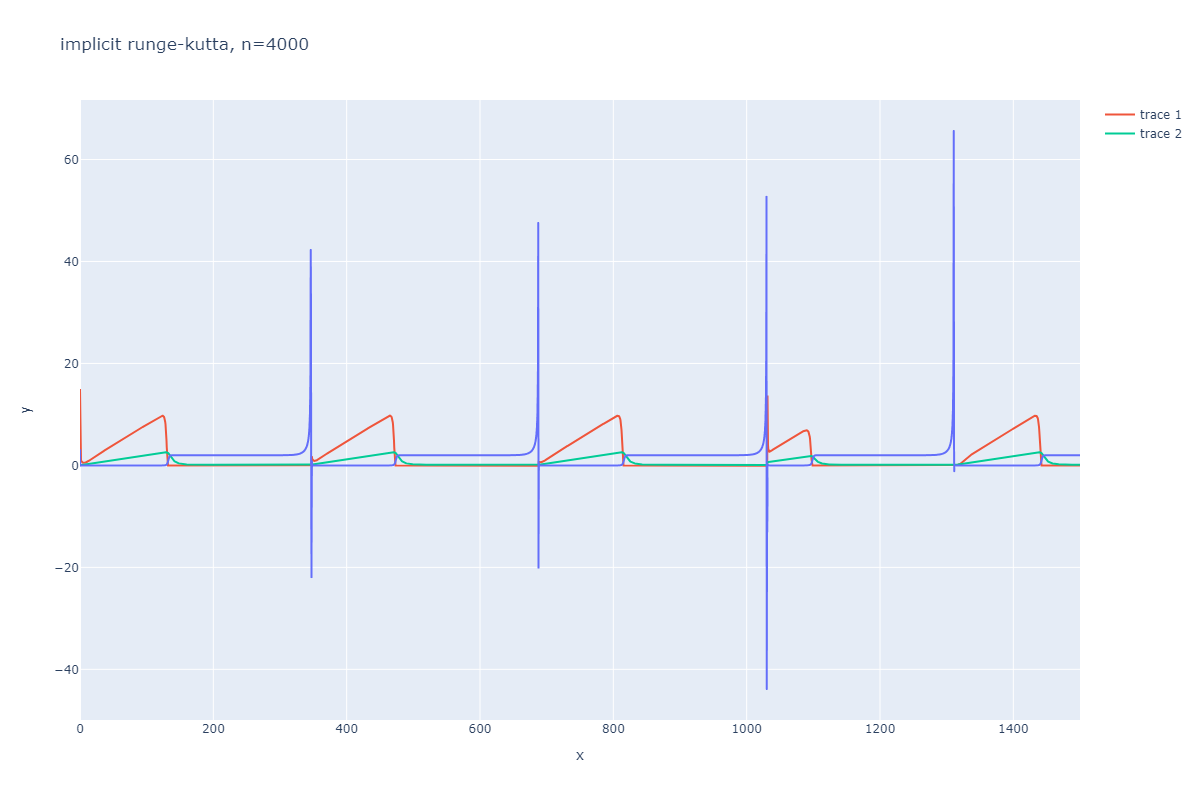

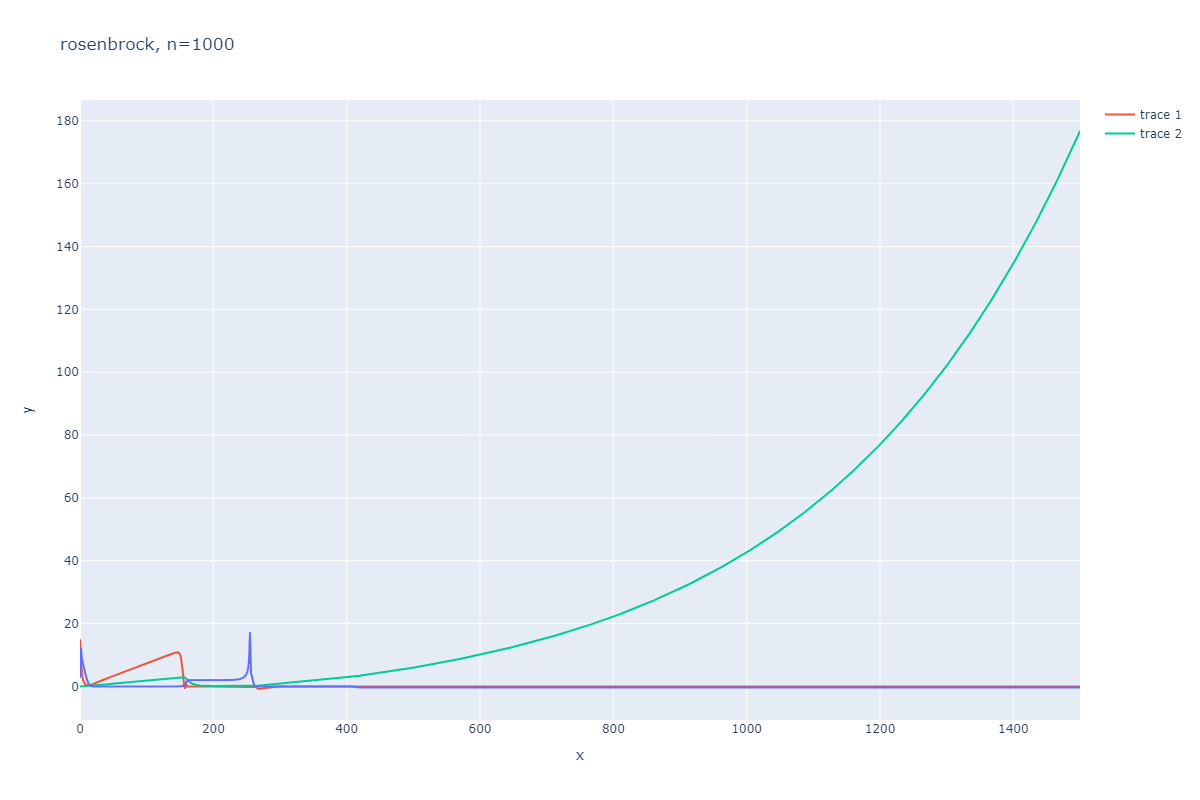

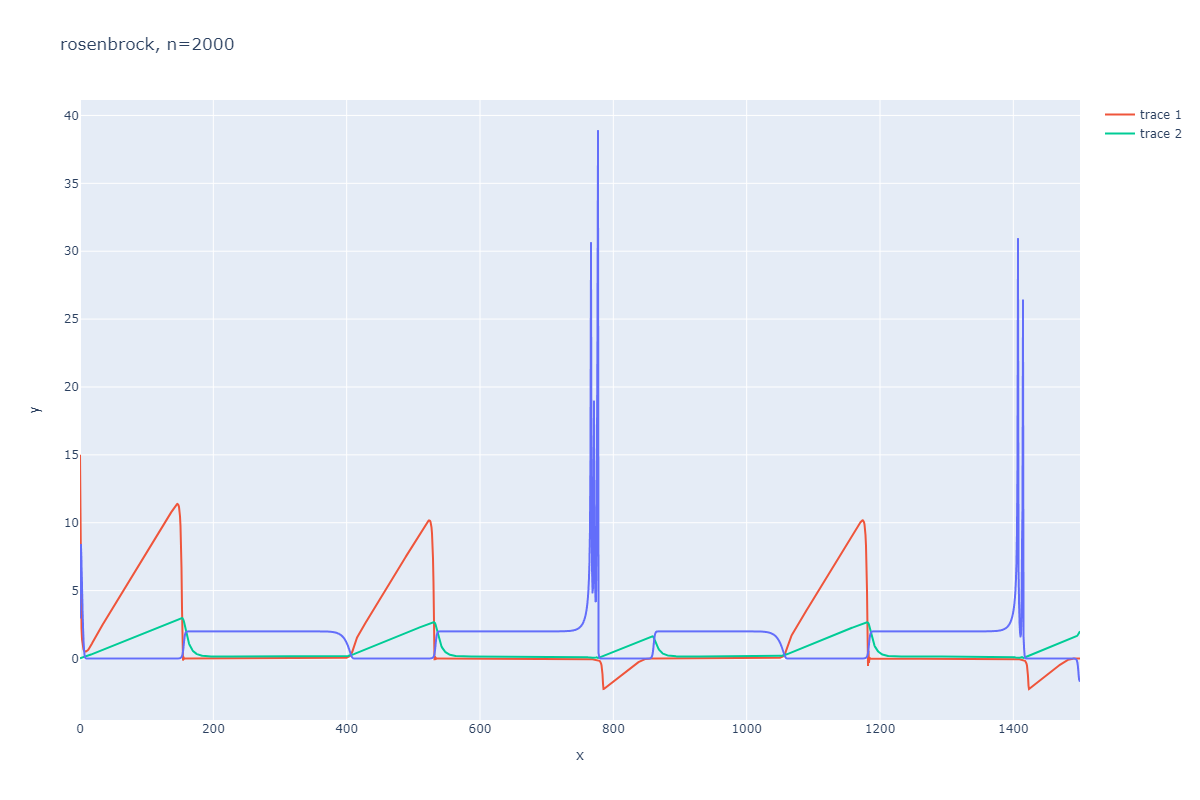

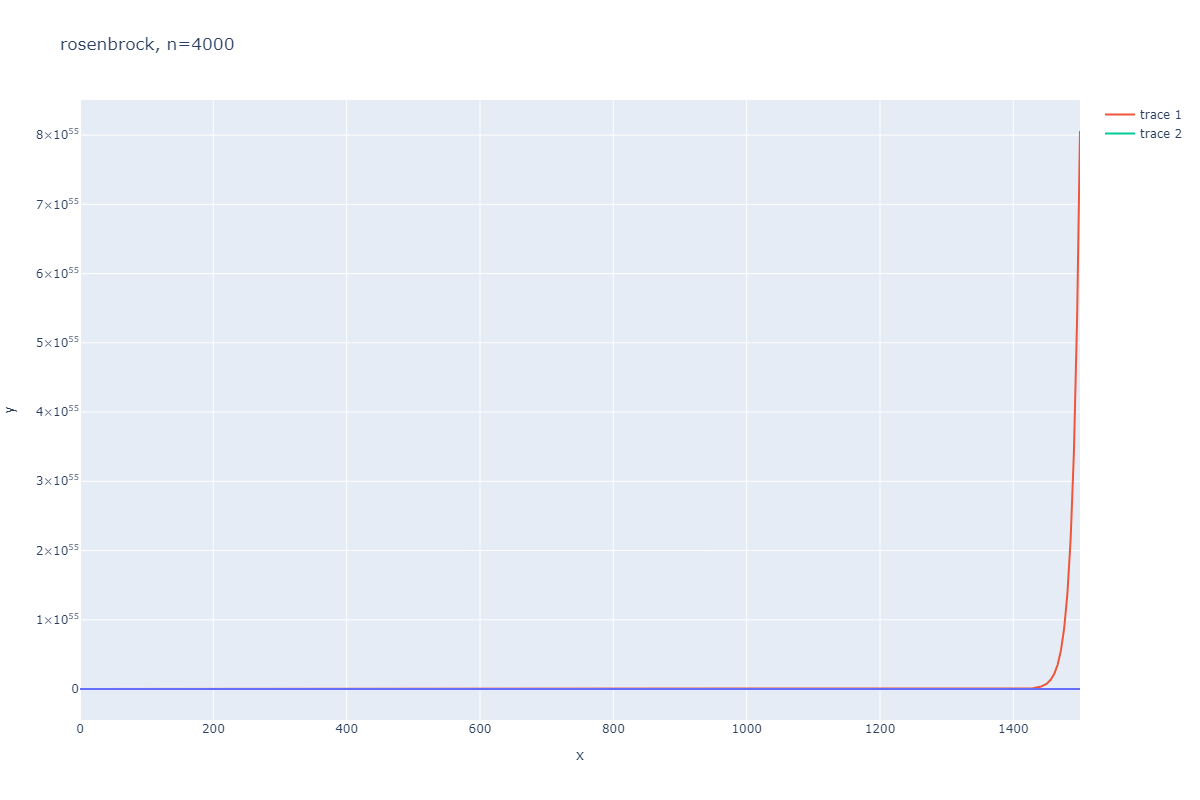

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:4: RuntimeWarning:

overflow encountered in scalar multiply

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2525156609.py:19: RuntimeWarning:

invalid value encountered in matmul

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:3: RuntimeWarning:

overflow encountered in scalar power

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:3: RuntimeWarning:

invalid value encountered in scalar multiply

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:4: RuntimeWarning:

overflow encountered in scalar power

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:5: RuntimeWarning:

overflow encountered in scalar multiply

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2525156609.py:20: RuntimeWarning:

invalid value encountered in matmul



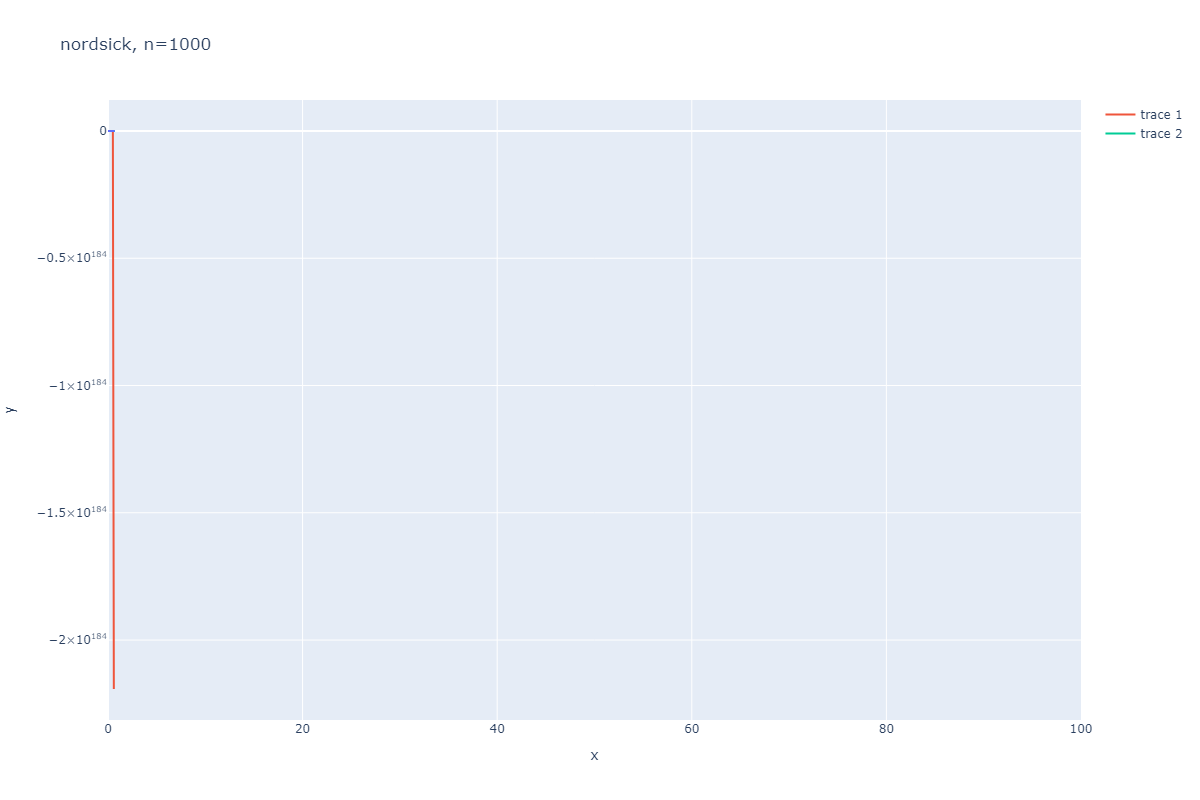

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:4: RuntimeWarning:

overflow encountered in scalar multiply

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2525156609.py:19: RuntimeWarning:

invalid value encountered in matmul

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2525156609.py:20: RuntimeWarning:

invalid value encountered in matmul

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:3: RuntimeWarning:

overflow encountered in scalar power

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:4: RuntimeWarning:

overflow encountered in scalar power



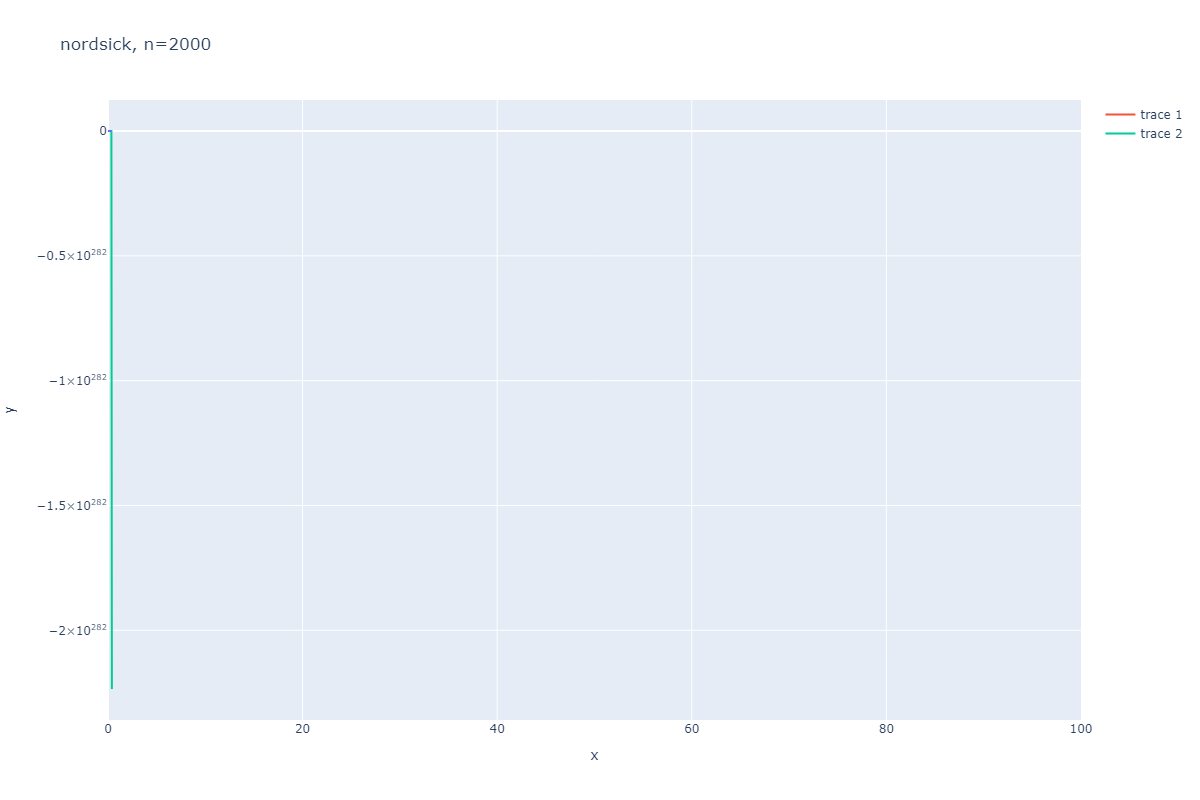

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:4: RuntimeWarning:

overflow encountered in scalar multiply

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2525156609.py:19: RuntimeWarning:

invalid value encountered in matmul

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:3: RuntimeWarning:

overflow encountered in scalar power

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:3: RuntimeWarning:

invalid value encountered in scalar multiply

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:4: RuntimeWarning:

overflow encountered in scalar power

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:5: RuntimeWarning:

overflow encountered in scalar multiply

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2525156609.py:20: RuntimeWarning:

invalid value encountered in matmul



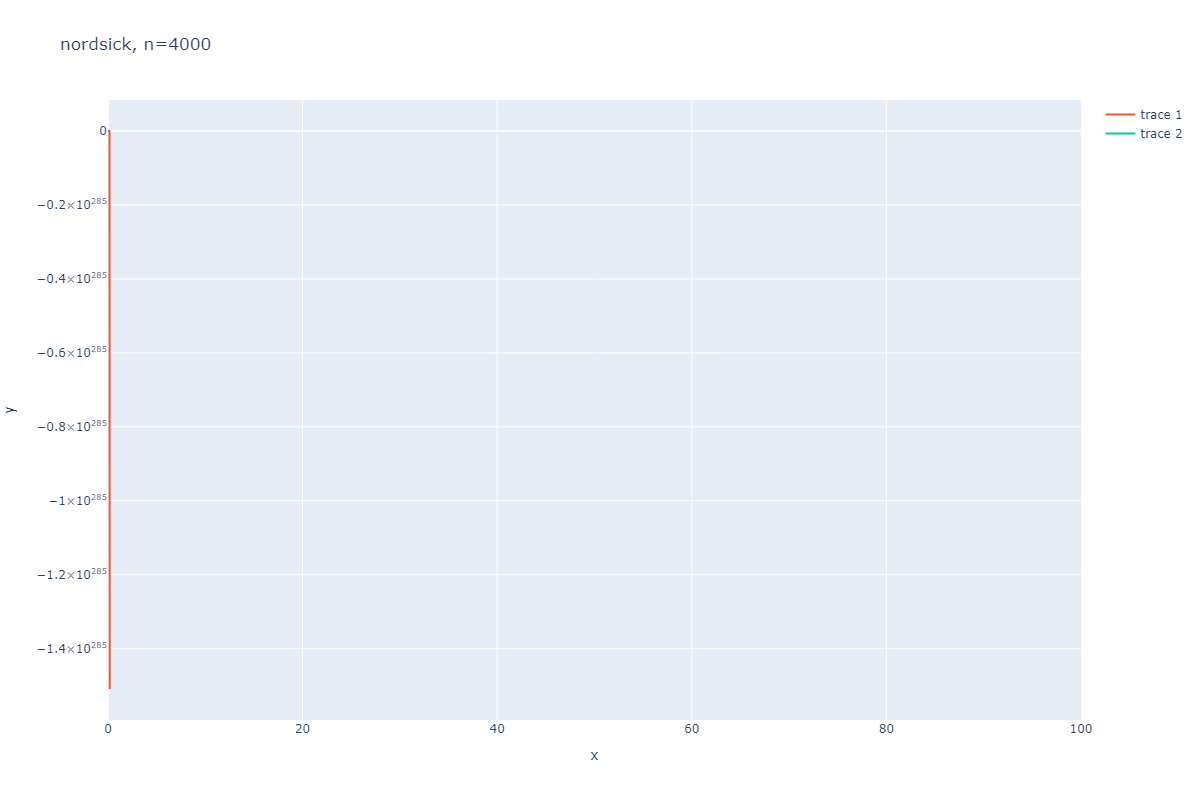

In [186]:
for func, name in zip(
        [calc_scipy, calc_implicit_rk, calc_rosenbrock, calc_nordsick], 
        ['scipy', 'implicit runge-kutta', 'rosenbrock', 'nordsick']
    ):
    for n in [1000, 2000, 4000]:
        test_method(func, n, name)

Even big number of points does not work:


C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:4: RuntimeWarning:

overflow encountered in scalar multiply

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2525156609.py:19: RuntimeWarning:

invalid value encountered in matmul

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:3: RuntimeWarning:

overflow encountered in scalar power

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:3: RuntimeWarning:

invalid value encountered in scalar multiply

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:4: RuntimeWarning:

overflow encountered in scalar power

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:4: RuntimeWarning:

invalid value encountered in scalar subtract

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2996292834.py:5: RuntimeWarning:

overflow encountered in scalar multiply

C:\Users\User\AppData\Local\Temp\ipykernel_3612\2525156609.py:20: RuntimeWarning:

invalid value encountered in matmul



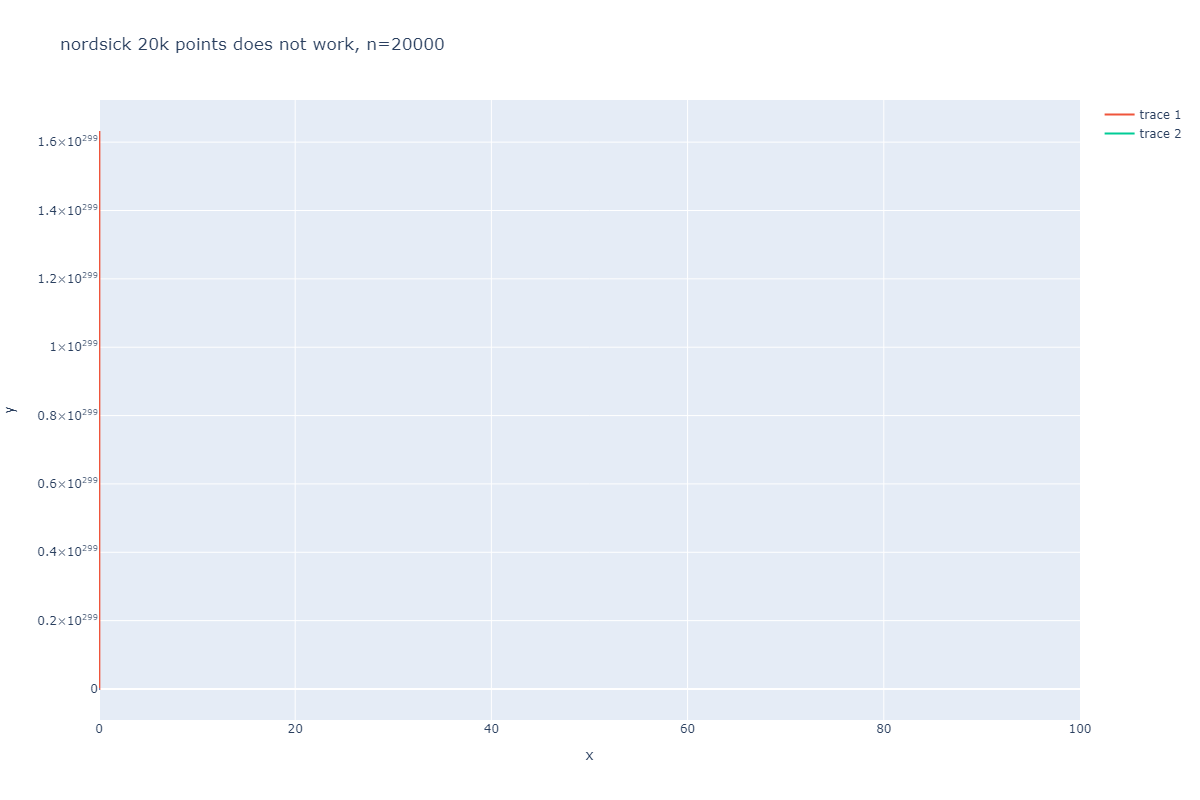

In [184]:
print("Even big number of points does not work:")

test_method(calc_nordsick, 20_000, 'nordsick 20k points does not work')

Good example of Nordick!!
also I've tried like 5 variants of l, none of them work


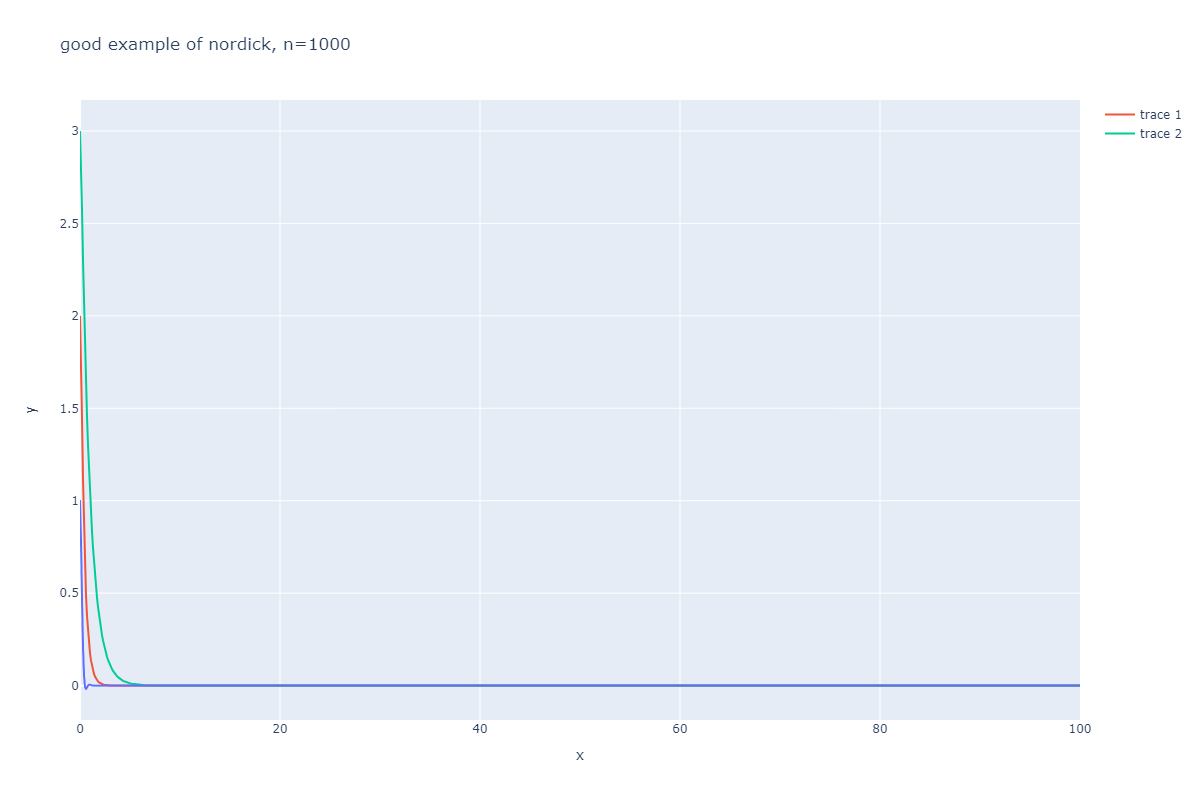

In [187]:
print("Good example of Nordick!!")

print("also I've tried like 5 variants of l, none of them work")

def calc_fx(x, y, z):
    return -4*x

def calc_fy(x, y, z):
    return -2*y

def calc_fz(x,y,z):
    return -z

test_method(lambda n: calc_nordsick_(
    n, np.array([6/11,1,6/11,1/11]), 
    np.array((1,2,3)), lambda x,y,z: np.array((
        calc_fx(x,y,z), calc_fy(x,y,z), calc_fz(x,y,z)
    ))), 1000, 'good example of nordick')